In [2]:
import os
import re
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
files_present = os.listdir()
files_present

['BaselineTensorboardPlots.ipynb',
 'run_baseline-tag-train_F1.csv',
 'run_baseline-tag-QAModel_loss_loss.csv',
 'run_baseline-tag-QAModel_loss_loss_end.csv',
 'run_baseline-tag-train_EM.csv',
 'run_baseline-tag-dev_loss.csv',
 'run_baseline-tag-dev_F1.csv',
 'run_baseline-tag-QAModel_loss_loss_start.csv',
 '.ipynb_checkpoints',
 'run_baseline-tag-dev_EM.csv']

In [53]:
runs = {f:{} for f in files_present if f.endswith('.csv')}

for r in runs.keys():
    runs[r]['title']  = r[r.find('run_')+4:r.find('-tag')]
    runs[r]['x_label']  = 'Steps'
    runs[r]['y_label']  = r[r.find('-tag-')+5:r.find('.csv')]
    runs[r]['data']  = np.genfromtxt(r, delimiter=',',skip_header = 1) 

#print(runs)

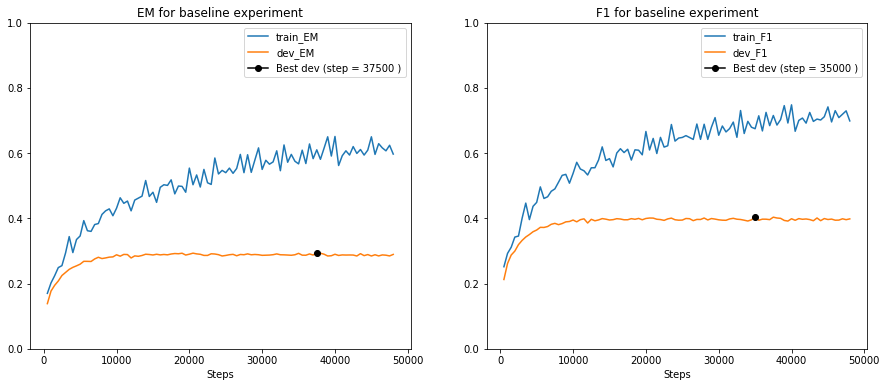

In [65]:
titles = ['EM', 'F1']
plt.figure(figsize=(15,6))
i = 1
for t in titles:
    titlestring = None
    plt.subplot(100+len(titles)*10+i)
    
    for r in runs.keys():
        if r.find(t) != -1:
            if titlestring == None:
                titlestring = ' for ' + runs[r]['title'] + ' experiment'
                plt.title(t +titlestring)
            plt.plot(runs[r]['data'][:,1],runs[r]['data'][:,2],label=runs[r]['y_label'])
        if r.find(t) != -1 and r.find('-dev_') != -1:
            ydata = runs[r]['data'][:,2]
            index_of_max = max(range(len(ydata)),key = lambda i: ydata[i])
            plt.plot(runs[r]['data'][index_of_max,1],ydata[index_of_max],
                     label='Best dev (step = %i )'%runs[r]['data'][index_of_max,1], marker='o',color='k')
            plt.xlabel('Steps')
            plt.legend()
            plt.ylim([0,1.0])
        
            
    i+=1

#Save the figure
figurename =''.join(titles) + titlestring.lower().replace(' ','-') + '.png'
plt.savefig(figurename, dpi =200, bbox_inches='tight')

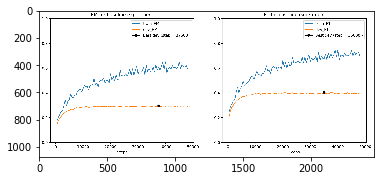

In [66]:
plt.imshow(plt.imread(figurename))

loss-for-baseline-experiment.png


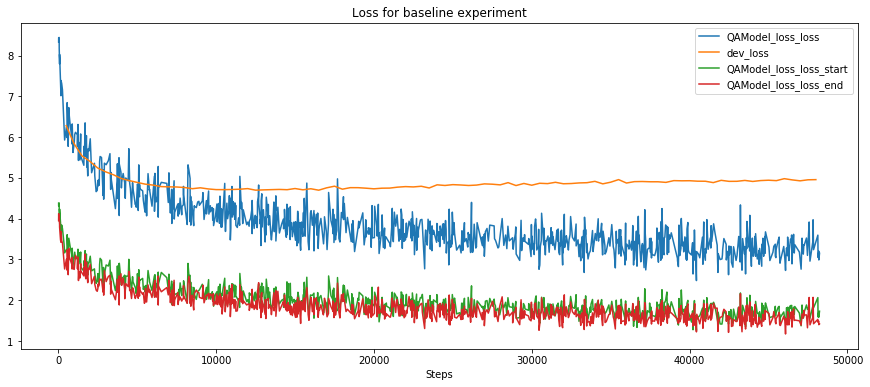

In [68]:
titles = ['loss']
plt.figure(figsize=(15,6))
i = 1
for t in titles:
    titlestring = None
    plt.subplot(100+len(titles)*10+i)
    
    for r in runs.keys():
        if r.find(t) != -1:
            if titlestring == None:
                titlestring = ' for ' + runs[r]['title'] + ' experiment'
                plt.title(str.capitalize(t +titlestring))
            plt.plot(runs[r]['data'][:,1],runs[r]['data'][:,2],label=runs[r]['y_label'])
            plt.xlabel('Steps')
            plt.legend()
    i+=1

#Save the figure
figurename =''.join(titles) + titlestring.lower().replace(' ','-') + '.png'
print(figurename)
plt.savefig(figurename, dpi =200, bbox_inches='tight')

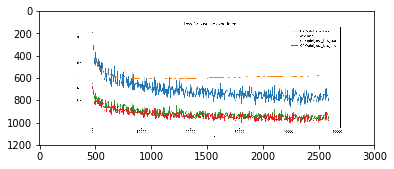

In [52]:
plt.imshow(plt.imread(figurename))